<a href="https://colab.research.google.com/github/thaisgulias/DataAnalytics_student/blob/main/Aprendendo_An%C3%A1lise_Com_Pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 19.1 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=57c49351b260d0e188157ff4a7f16304cbe50bb6c2d8fe7d1e7a888831467981
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
!pip install gcsfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.0/154.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.3.0
    Uninstalling fsspec-2023.3.0:
      Successfully uninstalled fsspec-2023.3.0


In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.cloud import storage
import os
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#CONFIGURAR A CHAVE
serviceAccount = '/content/compact-epigram-377819-c2c380ae78c0.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
#ACESSAR A BUCKET CRIADA
client = storage.Client()

bucket = client.get_bucket('projeto_spark')

bucket.blob('dataset.csv')

path = 'gs://projeto_spark/dataset.csv'

In [ ]:
#CONFIGURAR A VARIÁVEL DE AMBIENTE (SESSÃO)
spark = (SparkSession.builder
                     .master('local[2]')
                     .appName('ad1_pratica')
                     .config('spark.ui.port', '4050')
                     .config("spark.jars", 'https://storage.googleapis.com/hadoop-lib/gcs/gcs-connector-hadoop2-latest.jar')
                     .getOrCreate()
)

In [ ]:
spark

In [ ]:
#IMPORTEM O DATAFRAME DO DRIVE
df = (
    spark.read
         .format('csv')
         .option('delimiter', ',')
         .option('header', 'true')
         .option('inferschema', 'true')
         .load(path)
)

ANÁLISE EXPLORATÓRIA DOS DADOS

In [ ]:
#VISUALIZAR AS COLUNAS
df.printSchema()

root
 |-- customerid: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- salary: integer (nullable = true)
 |-- balance: integer (nullable = true)
 |-- marital: string (nullable = true)
 |-- jobedu: string (nullable = true)
 |-- targeted: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- response: string (nullable = true)



In [ ]:
len(df.columns)

19

In [ ]:
#SHAPE
print(f'({df.count()}, {len(df.columns)})')

(45211, 19)


In [ ]:
#AMOSTRA DOS DADOS
df.show()

+----------+---+------+-------+--------+--------------------+--------+-------+-------+----+-------+---+---------+--------+--------+-----+--------+--------+--------+
|customerid|age|salary|balance| marital|              jobedu|targeted|default|housing|loan|contact|day|    month|duration|campaign|pdays|previous|poutcome|response|
+----------+---+------+-------+--------+--------------------+--------+-------+-------+----+-------+---+---------+--------+--------+-----+--------+--------+--------+
|         1| 58|100000|   2143| married| management,tertiary|     yes|     no|    yes|  no|unknown|  5|may, 2017| 261 sec|       1|   -1|       0| unknown|      no|
|         2| 44| 60000|     29|  single|technician,secondary|     yes|     no|    yes|  no|unknown|  5|may, 2017| 151 sec|       1|   -1|       0| unknown|      no|
|         3| 33|120000|      2| married|entrepreneur,seco...|     yes|     no|    yes| yes|unknown|  5|may, 2017|  76 sec|       1|   -1|       0| unknown|      no|
|         

In [ ]:
df.printSchema()

root
 |-- customerid: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- salary: integer (nullable = true)
 |-- balance: integer (nullable = true)
 |-- marital: string (nullable = true)
 |-- jobedu: string (nullable = true)
 |-- targeted: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- response: string (nullable = true)



In [ ]:
#FAZER UMA VERIFICAÇÃO DAS VARIÁVEIS (média, mediana, valor mínimo, valor máximo)
lista_colunas = ['age', 'salary', 'balance', 'day', 'campaign', 'pdays', 'previous']
df.select(lista_colunas).summary().show()

+-------+------------------+-----------------+------------------+-----------------+-----------------+------------------+------------------+
|summary|               age|           salary|           balance|              day|         campaign|             pdays|          previous|
+-------+------------------+-----------------+------------------+-----------------+-----------------+------------------+------------------+
|  count|             45191|            45185|             45211|            45211|            45211|             45211|             45211|
|   mean| 40.93565090394105|57008.65331415293|1362.2720576850766|15.80641879188693|2.763840658246887| 40.19782796222158|0.5803233726305546|
| stddev|10.619197578972605| 32086.0285215707|3044.7658291685257|8.322476153044594|3.098020883279192|100.12874599059828| 2.303441044931218|
|    min|                18|                0|             -8019|                1|                1|                -1|                 0|
|    25%|           

In [ ]:
#Verificar nas colunas se possuem valores nulos
df.toPandas().isna().any()

customerid    False
age            True
salary         True
balance       False
marital       False
jobedu        False
targeted      False
default       False
housing       False
loan          False
contact       False
day           False
month          True
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
response       True
dtype: bool

In [ ]:
#Verificar nas colunas a quantidade de valores nulos
df.toPandas().isna().sum()

customerid     0
age           20
salary        26
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [ ]:
#VERIFICAR SE NAS COLUNAS POSSUEM VALORES NULOS COM O Pyspark - Valores nulos NULL
df.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+----------+---+------+-------+-------+------+--------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+--------+
|customerid|age|salary|balance|marital|jobedu|targeted|default|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|response|
+----------+---+------+-------+-------+------+--------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+--------+
|         0| 20|    26|      0|      0|     0|       0|      0|      0|   0|      0|  0|   50|       0|       0|    0|       0|       0|      30|
+----------+---+------+-------+-------+------+--------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+--------+



In [ ]:
df.columns

['customerid',
 'age',
 'salary',
 'balance',
 'marital',
 'jobedu',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

In [ ]:
#DROPAMOS A COLUNA DE ID, POIS ELA SERVE APENAS PARA IDENTIFICAR UM REGISTRO E NÃO SERÁ UTILIZADA NA NOSSA ANÁLISE
df = df.drop(F.col('customerid'))

In [ ]:
df.show()

+---+------+-------+--------+--------------------+--------+-------+-------+----+-------+---+---------+--------+--------+-----+--------+--------+--------+
|age|salary|balance| marital|              jobedu|targeted|default|housing|loan|contact|day|    month|duration|campaign|pdays|previous|poutcome|response|
+---+------+-------+--------+--------------------+--------+-------+-------+----+-------+---+---------+--------+--------+-----+--------+--------+--------+
| 58|100000|   2143| married| management,tertiary|     yes|     no|    yes|  no|unknown|  5|may, 2017| 261 sec|       1|   -1|       0| unknown|      no|
| 44| 60000|     29|  single|technician,secondary|     yes|     no|    yes|  no|unknown|  5|may, 2017| 151 sec|       1|   -1|       0| unknown|      no|
| 33|120000|      2| married|entrepreneur,seco...|     yes|     no|    yes| yes|unknown|  5|may, 2017|  76 sec|       1|   -1|       0| unknown|      no|
| 47| 20000|   1506| married| blue-collar,unknown|      no|     no|    yes| 

In [ ]:
#SEPARAR A COLUNA job da coluna education (jobedu)
#CRIAR COLUNA JOB - F.split(F.col(), separador).getItem(0)
#CRIAR COLUNA EDUCATION - F.split(F.col(), separador).getItem(1)
df = ( df.withColumn('job', F.split(F.col('jobedu'), ',').getItem(0))
    .withColumn('education', F.split(F.col('jobedu'), ',').getItem(1))                  
)

In [ ]:
#NÃO PRECISAMOS MAIS DA COLUNA jobedu, ENTÃO VAMOS DROPÁ-LA
df = df.drop(F.col('jobedu'))

AGORA O PRÓXIMO PASSO É IDENTIFICAR OS VALORES AUSENTES NAS COLUNAS E REALIZAR ALGUM TIPO DE TRATAMENTO

In [ ]:
#ENCONTRAR A QUANTIDADE DE VALORES AUSENTES DA COLUNA AGE
df.filter(F.col('age').isNull() | F.isnan(F.col('age'))).count()

20

In [ ]:
#CALCULAR O PERCENTUAL DE VALORES AUSENTES NA VARIÁVEL AGE
media = (df.filter(F.col('age').isNull() | F.isnan(F.col('age'))).count() / df.select('age').count() * 100)

print(media)

0.0442370219636814


Verificamos que o percentual de valores ausentes na coluna AGE é 0,04%.
Para que eu pudesse excluir a coluna da análise, ela deveria ter no mínimo 30% de valores ausentes. Não podemos dropar a coluna nesse caso.

O que resta fazer?
 - Eliminar os registros (linhas)
 - Imputação - Colocar algum valor no lugar dos nulos. Podemos colocar em grande parte dos casos uma MEDIDA DE TENDÊNCIA CENTRAL (média, mediana, moda)

In [ ]:
#VAMOS FAZER ALGUNS GRÁFICOS SOBRE A COLUNA AGE PARA ANALISARMOS MELHOR

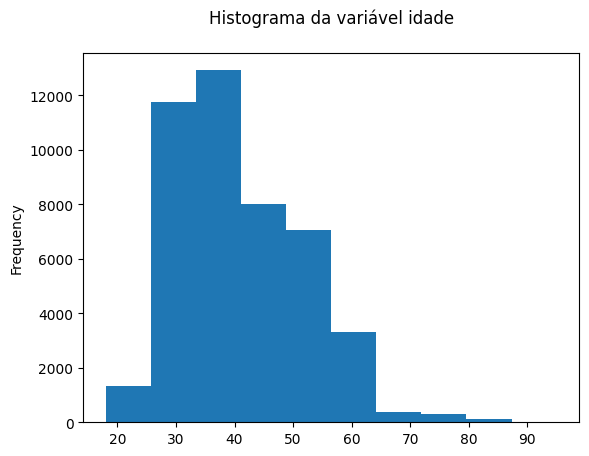

In [ ]:
#HISTOGRAMA DA COLUNA AGE
df.toPandas().age.plot(kind='hist')
plt.title('Histograma da variável idade\n')
plt.show()

Analisando o histograma, percebemos que os dados não seguem uma simetria. Portanto ele não segue uma distribuição normal. Não podemos utilizar a média para substituir os valores nulos.

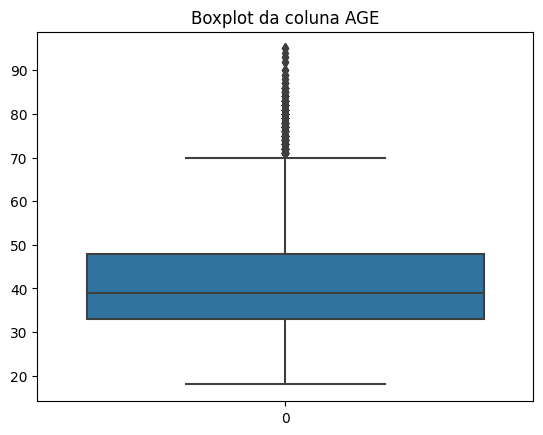

In [ ]:
#BOXPLOT DA COLUNA AGE
sns.boxplot(df.toPandas().age)
plt.title("Boxplot da coluna AGE")
plt.show()

In [ ]:
#VAMOS CALCULAR A MÉDIA DA IDADE
df.select(F.avg('age')).show()

+-----------------+
|         avg(age)|
+-----------------+
|40.93565090394105|
+-----------------+



In [ ]:
#VAMOS CALCULAR A MEDIANA
#df.select(F.percentile_approx(F.col('age'), 0.5)).show()
df.toPandas().age.median()

39.0

In [ ]:
#VAMOS CALCULAR A MODA
df.toPandas().age.mode()

0    32.0
Name: age, dtype: float64

In [ ]:
#Backup do DF
df_backup = df

In [ ]:
#IREMOS ESCOLHER A MODA, POIS SÃO POUCOS REGISTROS E ISSO NÃO IRÁ CAUSAR UM IMPACTO
df = df.fillna(32, subset='age')

In [ ]:
#VAMOS CALCULAR A MÉDIA DA IDADE
df.select(F.avg('age')).show()

+-----------------+
|         avg(age)|
+-----------------+
|40.93169803808808|
+-----------------+



In [ ]:
#VAMOS CALCULAR A MEDIANA
#df.select(F.percentile_approx(F.col('age'), 0.5)).show()
df.toPandas().age.median()

39.0

In [ ]:
#CALCULAR O PERCENTUAL DE VALORES AUSENTES NA VARIÁVEL AGE
media = (df.filter(F.col('age').isNull() | F.isnan(F.col('age'))).count() / df.select('age').count() * 100)

print(media)

0.0


Continuando com as colunas com valores ausentes

In [ ]:
df.select(F.col('month')).show()

+---------+
|    month|
+---------+
|may, 2017|
|may, 2017|
|may, 2017|
|may, 2017|
|may, 2017|
|may, 2017|
|may, 2017|
|may, 2017|
|may, 2017|
|may, 2017|
|may, 2017|
|may, 2017|
|may, 2017|
|may, 2017|
|may, 2017|
|may, 2017|
|may, 2017|
|may, 2017|
|may, 2017|
|may, 2017|
+---------+
only showing top 20 rows



In [ ]:
#Calcular a quantidade de valores ausentes em month
df.filter(F.col('month').isNull() | F.isnan(F.col('month'))).count()

50

In [ ]:
#Calcular a porcentagem de valores ausentes em month
media = (df.filter(F.col('month').isNull() | F.isnan(F.col('month'))).count() / df.select('month').count() * 100)

print(media)

0.11059255490920351


Como não podemos dropar a coluna, teremos que buscar outras soluções:
- imputação
- Dropar as linhas

In [ ]:
#VERIFICAR OS MESES QUE MAIS APARECEM
#df.groupBy('month').count().orderBy('count', ascending=False).show()
df.groupBy('month').count().orderBy(F.col('count').desc()).show()

+---------+-----+
|    month|count|
+---------+-----+
|may, 2017|13747|
|jul, 2017| 6888|
|aug, 2017| 6240|
|jun, 2017| 5335|
|nov, 2017| 3968|
|apr, 2017| 2931|
|feb, 2017| 2646|
|jan, 2017| 1402|
|oct, 2017|  738|
|sep, 2017|  576|
|mar, 2017|  476|
|dec, 2017|  214|
|     null|   50|
+---------+-----+



In [ ]:
#IMPUTANDO OS VALORES NULOS DE month PARA A MODA may, 2017
df = df.fillna('may, 2017', subset='month')

In [ ]:
#Calcular a quantidade de valores ausentes em month
df.filter(F.col('month').isNull() | F.isnan(F.col('month'))).count()

0

In [ ]:
#Calcular a porcentagem de valores ausentes em month
media = (df.filter(F.col('month').isNull() | F.isnan(F.col('month'))).count() / df.select('month').count() * 100)

print(media)

0.0


In [ ]:
#Verificar a quantidade de valores ausentes na coluna salary
df.filter((F.col('salary').isNull() | F.isnan(F.col('salary')) | (F.col('salary') == 0))).count()

314

In [ ]:
#Verificar a porcentagem de valores ausentes na coluna salary
media = (df.filter((F.col('salary').isNull() | F.isnan(F.col('salary')) | (F.col('salary') == 0))).count() / df.select('salary').count() * 100)

print(media)

0.694521244829798


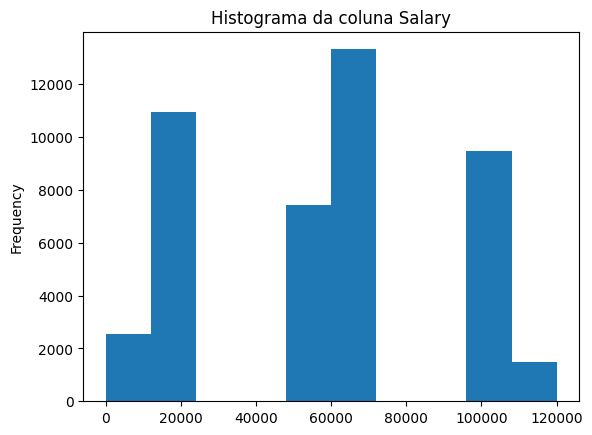

In [ ]:
#Faça o Histograma da salary

#calcule média, mediana e moda
df.toPandas().salary.plot(kind = 'hist')
plt.title('Histograma da coluna Salary')
plt.show()

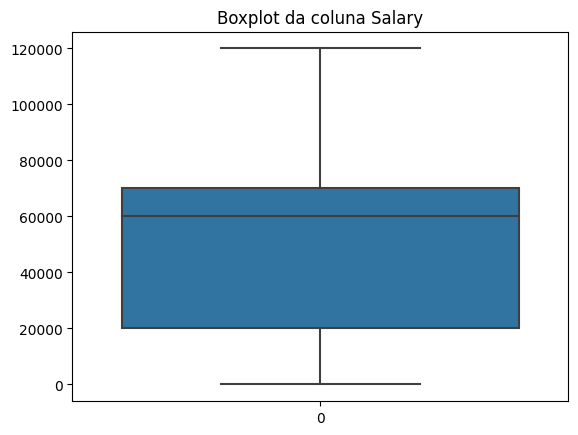

In [ ]:
#Faça o boxplot da salary
sns.boxplot(df.toPandas().salary)
plt.title("Boxplot da coluna Salary")
plt.show()

In [ ]:
#Calculo da Média
df.select(F.avg('salary')).show()

+-----------------+
|      avg(salary)|
+-----------------+
|57008.65331415293|
+-----------------+



In [ ]:
#Cálculo da Mediana
df.select(F.percentile_approx(F.col('salary'), 0.5)).show()

+-------------------------------------+
|percentile_approx(salary, 0.5, 10000)|
+-------------------------------------+
|                                60000|
+-------------------------------------+



In [ ]:
#Cálculo da Moda
df.toPandas().salary.mode()

0    20000.0
Name: salary, dtype: float64

In [ ]:
#Substituição dos valores ausentes de salary para a mediana
df = df.fillna(60000, subset='salary')

In [ ]:
df = df.replace(0, 60000, subset='salary')

In [ ]:
#Verificar a quantidade de valores ausentes na coluna salary
df.filter((F.col('salary').isNull() | F.isnan(F.col('salary')) | (F.col('salary') == 0))).count()

0

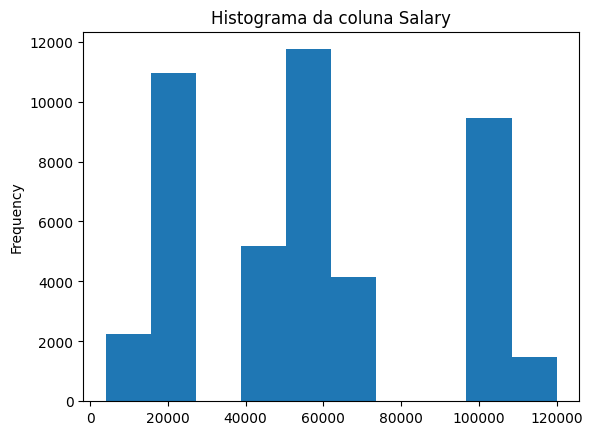

In [ ]:
#Faça o Histograma da salary

#calcule média, mediana e moda
df.toPandas().salary.plot(kind = 'hist')
plt.title('Histograma da coluna Salary')
plt.show()

In [ ]:
#Calculo da Média
df.select(F.avg('salary')).show()

+-----------------+
|      avg(salary)|
+-----------------+
|57392.58145141669|
+-----------------+



In [ ]:
#Cálculo da Mediana
df.select(F.percentile_approx(F.col('salary'), 0.5)).show()

+-------------------------------------+
|percentile_approx(salary, 0.5, 10000)|
+-------------------------------------+
|                                60000|
+-------------------------------------+



In [ ]:
#Cálculo da Moda
df.toPandas().salary.mode()

0    20000
Name: salary, dtype: int32

In [ ]:
df.toPandas().isna().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [ ]:
#Quais as opções de respostas que aparecem na coluna response
df.select(F.col('response')).distinct().show()
df.select(F.col('response')).dropDuplicates().show()

+--------+
|response|
+--------+
|    null|
|      no|
|     yes|
+--------+

+--------+
|response|
+--------+
|    null|
|      no|
|     yes|
+--------+



In [ ]:
#Verificar quantidade de valores nulos em response
df.filter((F.col('response').isNull() | F.isnan(F.col('response')))).count()

30

In [ ]:
#Verificar percentual de valores nulos em response
media = (df.filter((F.col('response').isNull() | F.isnan(F.col('response')))).count() / df.select('salary').count() * 100)

print(media)

0.0663555329455221


In [ ]:
#Verificar quantidade de valores nulos em response
df.filter((F.col('response').isNull() | F.isnan(F.col('response')))).count()

30

In [ ]:
#Verificar percentual de valores nulos em response
media = (df.filter((F.col('response').isNull() | F.isnan(F.col('response')))).count() / df.select('salary').count() * 100)

print(media)

0.0663555329455221


In [ ]:
#Verificar o valor que aparece mais
df.groupBy('response').count().show()

+--------+-----+
|response|count|
+--------+-----+
|    null|   30|
|      no|39894|
|     yes| 5287|
+--------+-----+



In [ ]:
df.select(F.col('response')).printSchema()

root
 |-- response: string (nullable = true)



In [ ]:
#DROPAR AS LINHAS QUE POSSUEM O VALOR NULO EM response, POIS ELA É A NOSSA VARIÁVEL ALVO E NÃO
# PODEMOS IMPUTAR VALORES NELA
df = df.dropna(how='any', subset='response')
#df.filter(F.col('response').isNotNull())

In [ ]:
#Verificar percentual de valores nulos em response
media = (df.filter((F.col('response').isNull() | F.isnan(F.col('response')))).count() / df.select('salary').count() * 100)

print(media)

0.0


In [ ]:
df.show()

+---+------+-------+--------+--------+-------+-------+----+-------+---+---------+--------+--------+-----+--------+--------+--------+------------+---------+
|age|salary|balance| marital|targeted|default|housing|loan|contact|day|    month|duration|campaign|pdays|previous|poutcome|response|         job|education|
+---+------+-------+--------+--------+-------+-------+----+-------+---+---------+--------+--------+-----+--------+--------+--------+------------+---------+
| 58|100000|   2143| married|     yes|     no|    yes|  no|unknown|  5|may, 2017| 261 sec|       1|   -1|       0| unknown|      no|  management| tertiary|
| 44| 60000|     29|  single|     yes|     no|    yes|  no|unknown|  5|may, 2017| 151 sec|       1|   -1|       0| unknown|      no|  technician|secondary|
| 33|120000|      2| married|     yes|     no|    yes| yes|unknown|  5|may, 2017|  76 sec|       1|   -1|       0| unknown|      no|entrepreneur|secondary|
| 47| 20000|   1506| married|      no|     no|    yes|  no|unkno

In [ ]:
#Verificar os valores em pdays
df.select(F.col('pdays')).distinct().orderBy('pdays', ascending=True).show()

+-----+
|pdays|
+-----+
|   -1|
|    1|
|    2|
|    3|
|    4|
|    5|
|    6|
|    7|
|    8|
|    9|
|   10|
|   12|
|   13|
|   14|
|   15|
|   17|
|   18|
|   19|
|   20|
|   21|
+-----+
only showing top 20 rows



In [ ]:
#Verificar percentual de valores nulos em response
media = (df.filter((F.col('pdays').isNull() | F.isnan(F.col('pdays')))).count() / df.select('pdays').count() * 100)

print(media)

0.0


In [ ]:
df.filter(F.col('pdays') == -1).count()

36930

In [ ]:
#Verificar percentual de valores nulos em response
media = (df.filter(F.col('pdays') == -1).count() / df.select('pdays').count() * 100)

print(media)

81.73789867422147


In [ ]:
#Como a coluna pdays apresenta mais de 80% de valores ausentes, iremos dropá-la
df = df.drop(F.col('pdays'))

In [ ]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- salary: integer (nullable = true)
 |-- balance: integer (nullable = true)
 |-- marital: string (nullable = true)
 |-- targeted: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = false)
 |-- duration: string (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- response: string (nullable = true)
 |-- job: string (nullable = true)
 |-- education: string (nullable = true)



In [ ]:
df.show()

+---+------+-------+--------+--------+-------+-------+----+-------+---+---------+--------+--------+--------+--------+--------+------------+---------+
|age|salary|balance| marital|targeted|default|housing|loan|contact|day|    month|duration|campaign|previous|poutcome|response|         job|education|
+---+------+-------+--------+--------+-------+-------+----+-------+---+---------+--------+--------+--------+--------+--------+------------+---------+
| 58|100000|   2143| married|     yes|     no|    yes|  no|unknown|  5|may, 2017| 261 sec|       1|       0| unknown|      no|  management| tertiary|
| 44| 60000|     29|  single|     yes|     no|    yes|  no|unknown|  5|may, 2017| 151 sec|       1|       0| unknown|      no|  technician|secondary|
| 33|120000|      2| married|     yes|     no|    yes| yes|unknown|  5|may, 2017|  76 sec|       1|       0| unknown|      no|entrepreneur|secondary|
| 47| 20000|   1506| married|      no|     no|    yes|  no|unknown|  5|may, 2017|  92 sec|       1| 

In [ ]:
#VERIFICAR SE NAS COLUNAS POSSUEM VALORES NULOS COM O Pyspark - Valores nulos NULL
df.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+------+-------+-------+--------+-------+-------+----+-------+---+-----+--------+--------+--------+--------+--------+---+---------+
|age|salary|balance|marital|targeted|default|housing|loan|contact|day|month|duration|campaign|previous|poutcome|response|job|education|
+---+------+-------+-------+--------+-------+-------+----+-------+---+-----+--------+--------+--------+--------+--------+---+---------+
|  0|     0|      0|      0|       0|      0|      0|   0|      0|  0|    0|       0|       0|       0|       0|       0|  0|        0|
+---+------+-------+-------+--------+-------+-------+----+-------+---+-----+--------+--------+--------+--------+--------+---+---------+



FAZER UMA ANÁLISE DOS NOSSOS DADOS
- ANÁLISE UNIVARIADA
- ANÁLISE MULTIVARIADA

In [ ]:
# 1) QUANTIDADE DE PESSOAS POR CADA ESTADO CIVIL
df.groupBy(F.col('marital')).agg(F.count('marital').alias('Quantidade')).orderBy(F.col('Quantidade').asc()).show()

+--------+----------+
| marital|Quantidade|
+--------+----------+
|divorced|      5204|
|  single|     12782|
| married|     27195|
+--------+----------+



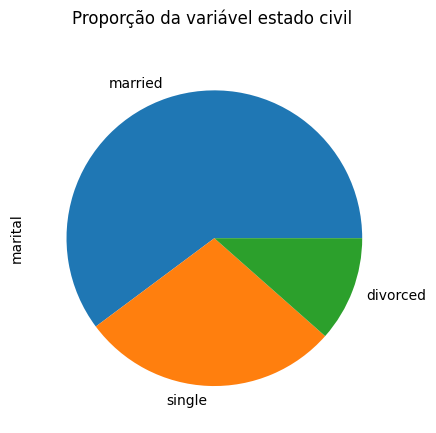

In [ ]:
df.toPandas().marital.value_counts().plot(kind = 'pie')
plt.title("Proporção da variável estado civil \n")
plt.show()

In [ ]:
# 2) QUANTIDADE DE PESSOAS POR CADA EMPREGO
df.groupBy(F.col('job')).agg(F.count('job').alias('Quantidade')).orderBy(F.col('Quantidade').desc()).show()

+-------------+----------+
|          job|Quantidade|
+-------------+----------+
|  blue-collar|      9727|
|   management|      9454|
|   technician|      7592|
|       admin.|      5166|
|     services|      4150|
|      retired|      2263|
|self-employed|      1575|
| entrepreneur|      1486|
|   unemployed|      1303|
|    housemaid|      1239|
|      student|       938|
|      unknown|       288|
+-------------+----------+



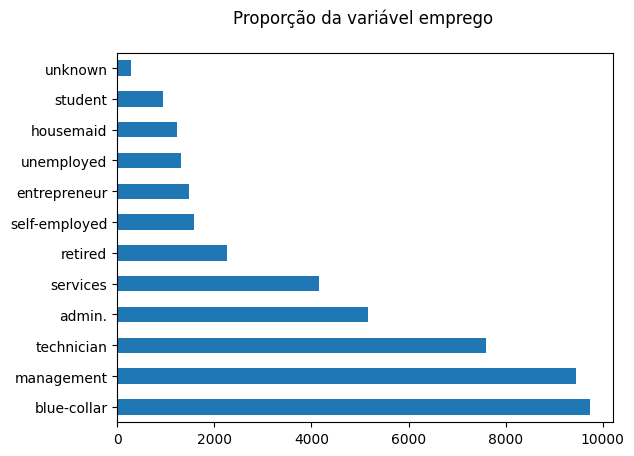

In [ ]:
df.toPandas().job.value_counts().plot(kind = 'barh')
plt.title("Proporção da variável emprego \n")
plt.show()

In [ ]:
# 3) QUANTIDADE DE PESSOAS POR NÍVEL EDUCACIONAL
df.groupBy(F.col('education')).agg(F.count('education').alias('Quantidade')).show()

+---------+----------+
|education|Quantidade|
+---------+----------+
|  unknown|      1856|
| tertiary|     13292|
|secondary|     23189|
|  primary|      6844|
+---------+----------+



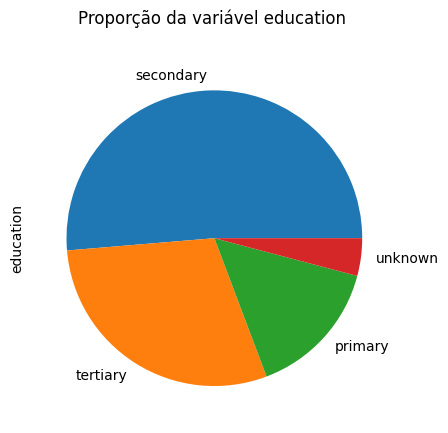

In [ ]:
df.toPandas().education.value_counts().plot(kind = 'pie')
plt.title("Proporção da variável education \n")
plt.show()

In [ ]:
# 4) QUANTIDADE DE RESPOSTAS SIM E NÃO
df.groupBy(F.col('response')).agg(F.count('response').alias('Quantidade')).orderBy(F.col('Quantidade').desc()).show()

+--------+----------+
|response|Quantidade|
+--------+----------+
|      no|     39894|
|     yes|      5287|
+--------+----------+



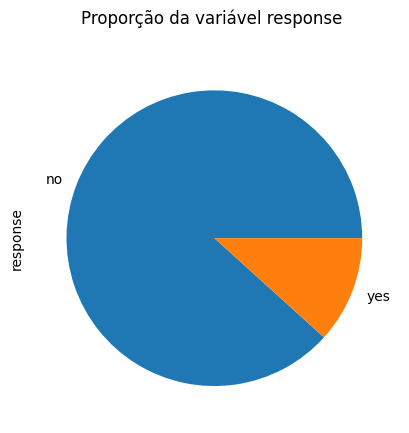

In [ ]:
df.toPandas().response.value_counts().plot(kind = 'pie')
plt.title("Proporção da variável response \n")
plt.show()

Estatística
- Correlação de Pearson - Soma (desvio padrão x . desvio padrão y) / quantidade de registros
Vai de -1 a +1

corr() - 0 (Não há correlação entre as duas colunas)
corr() - 1 (Há correlação Positiva, à medida que uma coluna aumenta, a outra também aumenta)
corr() - (-1) (hÁ Correlação Negativa, à medida que uma coluna aumenta, a outra diminui)

- Variância e Desvio Padrão

In [ ]:
df.select('age').summary().show()

+-------+-----------------+
|summary|              age|
+-------+-----------------+
|  count|            45181|
|   mean|40.93180761824661|
| stddev|10.61810294777961|
|    min|               18|
|    25%|               33|
|    50%|               39|
|    75%|               48|
|    max|               95|
+-------+-----------------+



In [ ]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- salary: integer (nullable = true)
 |-- balance: integer (nullable = true)
 |-- marital: string (nullable = true)
 |-- targeted: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = false)
 |-- duration: string (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- response: string (nullable = true)
 |-- job: string (nullable = true)
 |-- education: string (nullable = true)



In [ ]:
resultado2 = df.toPandas()[['salary', 'balance', 'age']].corr()

In [ ]:
resultado.head()

,salary,balance,age
salary,1.000000,0.057609,0.032272
balance,0.057609,1.000000,0.097729
age,0.032272,0.097729,1.000000


In [ ]:
resultado = df.corr('age', 'salary')

In [ ]:
print(resultado)

0.03227185116558834


In [ ]:
df_pandas = df.toPandas()

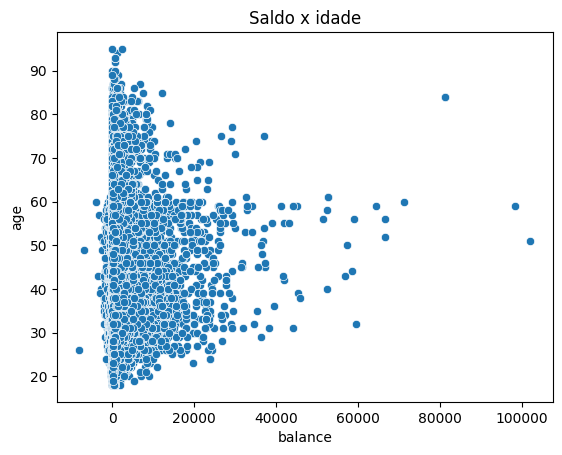

In [ ]:
sns.scatterplot(data = df_pandas, x='balance', y='age')
plt.title('Saldo x idade')
plt.show()

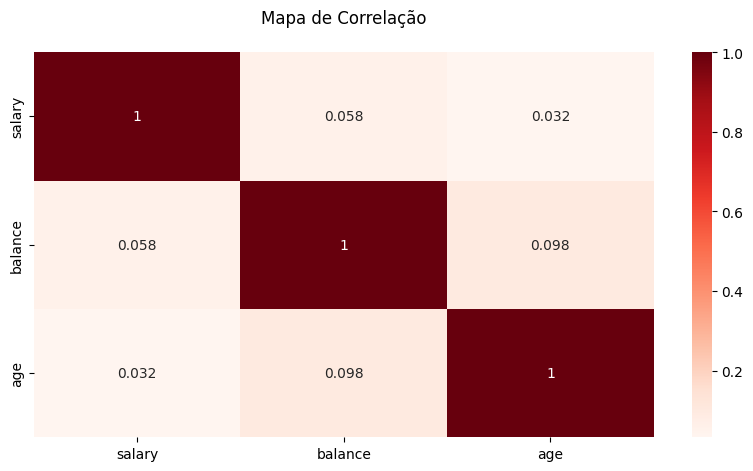

In [ ]:
plt.figure(figsize = (10, 5))
sns.heatmap(resultado2, annot= True, cmap = "Reds")
plt.title("Mapa de Correlação\n")
plt.show()

In [ ]:
#QUAL A MÉDIA SALARIAL DE ACORDO COM A RESPOSTA (sim ou não)
df.groupBy(F.col('response')).agg(F.avg('salary').alias('media_salary')).orderBy(F.col('media_salary').desc()).show()

+--------+------------------+
|response|      media_salary|
+--------+------------------+
|     yes|59157.556270096466|
|      no|57157.692886148296|
+--------+------------------+



In [ ]:
#QUAL A MÉDIA SALARIAL POR EDUCAÇÃO
df.groupBy(F.col('education')).agg(F.mean('salary').alias('media_salary')).orderBy(F.col('media_salary').desc()).show()

+---------+------------------+
|education|      media_salary|
+---------+------------------+
| tertiary| 83041.07733975323|
|  unknown|50708.512931034486|
|secondary|49922.420112984604|
|  primary| 34697.10695499708|
+---------+------------------+



In [ ]:
# CRIAR UMA NOVA COLUNA, response_flag (1 - sim, 0 - não) - 
# CALCULAR A CORRELAÇÃO ENTRE education, marital, response_flag
df = df.withColumn('response_flag', F.when(F.col('response') == 'yes', F.lit(1)).otherwise(F.lit(0)))

In [ ]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- salary: integer (nullable = true)
 |-- balance: integer (nullable = true)
 |-- marital: string (nullable = true)
 |-- targeted: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = false)
 |-- duration: string (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- response: string (nullable = true)
 |-- job: string (nullable = true)
 |-- education: string (nullable = true)
 |-- response_flag: double (nullable = false)



In [ ]:
df_pandas = df.toPandas()

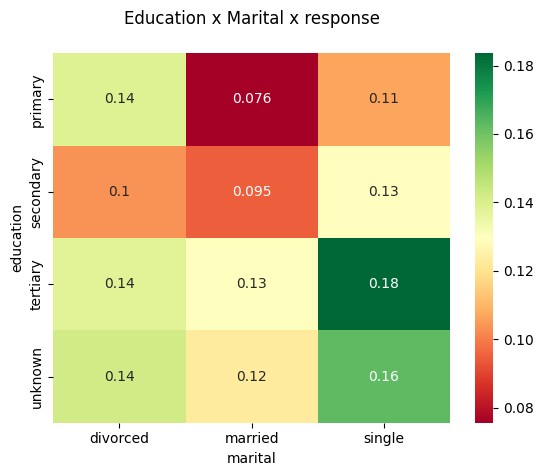

In [ ]:
#MAPA DE CORRELAÇÃO
resultado3 = df_pandas.pivot_table(index = 'education', columns = 'marital', values = 'response_flag', aggfunc="mean")
sns.heatmap(resultado3, annot = True, cmap="RdYlGn")
plt.title("Education x Marital x response\n")
plt.show()